# Python Homework 2

**Release date:** Saturday, April 18<br>
**Due date:** Friday, __May 8 (!)__, at midnight via <font color="blue">Gradescope</font> 

**Instruction:** Please upload your jupyter notebook on <font color="blue">Gradescope</font> with filename __PythonHW2_YOURPERMNUMBER.ipynb__.


Load some packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# LOAD MORE PACKAGES IF NEEDED

## Problem 1 (10 Points)

Consider the continuous-time __Registration Line Markov Chain__ from Example 2.13 (Lecture 7).

1. Implement a simulation of this Markov chain on the time interval $[0,60]$. 

In [2]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# ADD SOME COMMENTS TO YOUR CODE!()

# embedded chain transition matrix
P = np.array([[0,1,0,0,0],
             [4/9,0,5/9,0,0],
             [0,4/9,0,5/9,0],
             [0,0,4/9,0,5/9],
              [0,1,0,0,0]
             ])
# Ti ~ Exp (qi)
Ti = np.array([np.random.exponential(4),np.random.exponential(20/9),
              np.random.exponential(20/9),np.random.exponential(20/9),np.random.exponential(5)])

#Suppose Xt starts at 0.
Xt = np.array([0])

# time spent in last state
t = Ti[Xt[-1]]

totalT = 0 # total time spent sum of all ts
while True:
    if totalT <=60.0:
        t = np.append(t,Ti[Xt[-1]]) # stays in last state for exponentially distributed time
        totalT += t[-1] # increase total time
        # Xt goes from last state to other possible states with given probabiblity from transition matrix 
        # i.e. if Xt = 1, we choose next transition from 1 to 0 or 2 or 3  or 4 given their probabilities
        Xt = np.append(Xt,np.random.choice(np.arange(5),size = 1,p =P[Xt[-1]])) 
    else :
        t = np.cumsum(t) # sum the times
        t = t[t<=60] # cut off time where it is >60
        Xt = Xt[:len(t)] # cut off Xt where t >60
        break


print("The time of each state is " +str(t))
print("\n")
print("The state at time t is" + str(Xt))


The time of each state is [ 0.29134369  0.58268739  2.54472793  3.25984542  5.22188596  5.93700346
  6.07734912  6.80947613  8.77151666  9.06286036 11.0249009  11.31624459
 13.27828513 13.99340263 14.13374829 14.84886578 14.98921145 15.70432894
 15.8446746  16.5597921  16.70013776 17.41525526 19.37729579 20.09241329
 20.23275895 20.94787645 21.08822211 21.82034911 23.78238965 24.07373335
 26.03577389 26.32711758 28.28915812 29.00427562 30.96631616 31.25765985
 33.21970039 33.93481788 34.07516355 34.80729055 36.76933109 37.06067479
 39.02271532 39.31405902 41.27609956 41.99121705 42.13156271 42.86368972
 44.82573026 45.54084775 47.50288829 47.79423199 49.75627253 50.47139002
 52.43343056 53.14854806 53.28889372 54.02102072 55.98306126 56.69817876
 58.6602193  59.37533679]


The state at time t is[0 1 2 1 2 3 4 1 0 1 0 1 2 3 2 3 2 3 2 3 2 1 2 3 2 3 4 1 0 1 0 1 2 1 0 1 2
 3 4 1 0 1 0 1 2 3 4 1 2 1 0 1 2 1 2 3 4 1 2 1 2 1]


2. Plot a trajectory of this Markov Chain on $[0,60]$ by using your code from 1.

<i>Hint:</i> You can use the <tt>plt.hlines()</tt> command to plot horizontal lines (check also the documentation online).

Text(0, 0.5, 'Number of students at time t')

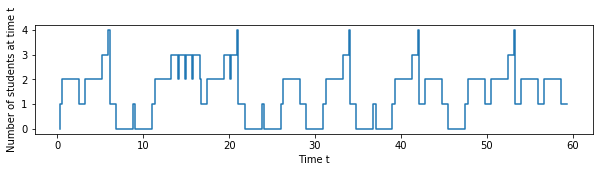

In [3]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# ADD SOME COMMENTS TO YOUR CODE!
fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(111)
ax.step(t,Xt)
ax.set_xlabel("Time t")
ax.set_ylabel("Number of students at time t")

3. Compute the transition function $P(t)$ at $t = \pi$.

*Hint:* Use a suitable function from the <tt>scipy.linalg</tt> package (check also the documentation online).

In [4]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# ADD SOME COMMENTS TO YOUR CODE!
Q = np.array([[-1/4,1/4,0,0,0],
    [1/5,-9/20,1/4,0,0],
    [0,1/5,-9/20,1/4,0],
    [0,0,1/5,-9/20,1/4],
    [0,0,0,1/5,-1/5]])



def P(Q,t):
    d_eigen,S_inv =np.linalg.eig(Q)
    S = np.linalg.inv(S_inv) # find S from S^-1
    d_eigen = np.exp(t*d_eigen)  # turns eigen values to e^td
    D = np.diag(d_eigen)  # makes a diagonal matrix with eigenvalues e**tD across diag
    return S@D@S_inv #S D S_1
    
P(Q,np.pi)

array([[ 0.47647886, -0.30366309,  0.05879298,  0.09627896, -0.05830548],
       [-0.31197335,  0.53170491, -0.23633078, -0.12856317,  0.04402113],
       [ 0.06140679, -0.24026238,  0.40937372,  0.01713599,  0.14209055],
       [ 0.08916563, -0.11589299,  0.01519443,  0.56846387, -0.27883903],
       [-0.06484408,  0.0476537 ,  0.15129869, -0.33484855,  0.38307641]])

4. Compute the stationary distribution of this continuous-time Markov chain.

*Hint:* Use suitable functions from the <tt>numpy.linalg package</tt> (check also the documentation online).

In [5]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# ADD SOME COMMENTS TO YOUR CODE!

import numpy as np

#note: the matrix is row stochastic.
#A markov chain transition will correspond to left multiplying by a row vector.
Q = np.array([[-1/4,1/4,0,0,0],
    [1/5,-9/20,1/4,0,0],
    [0,1/5,-9/20,1/4,0],
    [0,0,1/5,-9/20,1/4],
    [0,0,0,1/5,-1/5]])
QT = np.transpose(Q)
QT
D,V=np.linalg.eig(QT)
print(D)             # eigenvector is fourth element 
VT =np.transpose(V) # transforms column eigen vectors to row vectors so it's easier to pick
eig_vec0 = VT[3]    # Pick fourth eigenvector since fourth eigenvalue is 0
norm = np.sum(eig_vec0) # Normalize in L1 norm space
eig_vec0  = eig_vec0 /norm
print("Stationary distribution is " + str(eig_vec0))


[-8.11803399e-01 -5.88196601e-01 -3.11803399e-01 -6.22815470e-17
 -8.81966011e-02]
Stationary distribution is [0.12184674 0.15230842 0.19038553 0.23798191 0.29747739]


## Problem 2 (10 Points)

Multistate Markov models are used in medicine to model the course of diseases. A patient may advance into, or recover from, successively more severe stages of a disease until some terminal state. Each stage represents a state of an absorbing continuous-time Markov chain. 

Bartolomeo et al. (2011) develop such a model to study the progression of liver disease among patients diagnosed with cirrhosis of the liver. The general form of the infinitesimal generator matrix $Q$ for their three-parameter model is

$$ Q = \begin{pmatrix} -(q_{12} + q_{13}) & q_{12} & q_{13} \\ 0 & -q_{23} & q_{23} \\ 0 & 0 & 0 \end{pmatrix}  $$

where state 1 represents cirrhosis, state 2 denotes liver cancer, and state 3 is death.

1. Starting from the first stage ("cirrhosis"), estimate the mean time to death (i.e. ending up in stage 3) by running 100,000 simulations. Use the transition rates

$$ q_{12} = 0.0151, \quad q_{13} = 0.0071, \quad q_{23} = 0.0284.$$

In [6]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# ADD SOME COMMENTS TO YOUR CODE!


def simulation(n): # how many cancer events u want to simulate
    q12 = 0.0151
    q13 = 0.0071
    q23 = 0.0284
    PathFromStateOne = np.array([0,q12/(q12+q13),q13/(q12+q13)])

    q2 = q23      # T2~Exp(q2)
    q1 = q12+q13  #T1~Exp(q1)

    death = 0
    TotalT = 0

    for i in range(n):
        Xt = 1 # start at state 1
        T1 = np.random.exponential(1/q1) # stay in state 1 for some time 
        TotalT =T1 +TotalT
        Xt = int(np.random.choice(np.array([1,2,3]),size = 1,p =PathFromStateOne)) # Xt goes 2 or 3
        if Xt ==2:
            T2 = np.random.exponential(1/q2) # stay in T2 for some time
            death +=1 #then die
            TotalT += T2
            #then restart
        elif Xt == 3:
            death += 1 #die immediately 
    return TotalT/death
mysim = simulation(10000)
print("Mean to death in 10000 simulations is " + "%.2f" % round(mysim , 2))


Mean to death in 10000 simulations is 68.98


2. Compare your approximation from 1. with the exact theoretical mean time to death (implement a suitable formula from class).  

In [7]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# ADD SOME COMMENTS TO YOUR CODE!


#transient matrix
q12 = 0.0151
q13 = 0.0071
q23 = 0.0284
V = np.array([[-(q13+q12),q12],[0,-q23]])
F = -1 * np.linalg.inv(V)
print("Exact theoretical mean to death is " + "%.2f" % round(np.sum(F[0]),2))
error = abs((np.sum(F[0]) - mysim)/np.sum(F[0])) *100
print("The percent error is "+ "%.3f" % round(error,3) + "%")

Exact theoretical mean to death is 69.00
The percent error is 0.017%
